In [1]:
import os,sys
sys.path.append("..")
import src
%matplotlib inline

## Hierarchical clustering of a sample of ~100 neurons using persistence images

### Sample selection 
* First, set up experiment and randomly select 100 neurons to analyze

In [2]:
from src.scripts import hierarchical_clustering

/Users/User1/anaconda/envs/aibs/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Create experiment 
expt = hierarchical_clustering.TheExpt("h_clustering")

/Users/User1/DS/aibs/data/h_clustering already exists
/Users/User1/DS/aibs/results/h_clustering already exists


In [4]:
# Select neurons from list
spath = "../data/drosophila melanogaster__ids.tsv"
neurons = expt.pick_neurons_randomly(100, spath)

* Create persistence barcodes and store in h5f file 

In [5]:
# Generate 
gen = expt.get_pbcode_data(os.path.join(expt.data_path, "h5f.h5"))

In [6]:
expt.get_pbcode_and_store_in_h5file(gen)

Error in jefferis/CNG version/NA9B2.CNG.swc
	cannot safely convert passed user dtype of int8 for float64 dtyped data in column 2


In [8]:
expt.create_persistence_image_per_pbcode()

## Clustering

This is a first-pass attempt at hierarchical clustering, without normalization, tuning or filtering of samples.

In [9]:
from sklearn import cluster
from scipy.cluster.hierarchy import dendrogram, linkage

* Load persistence image and labels

In [10]:
X,names = hierarchical_clustering.render_data(expt)

Number of .swc files: 27900


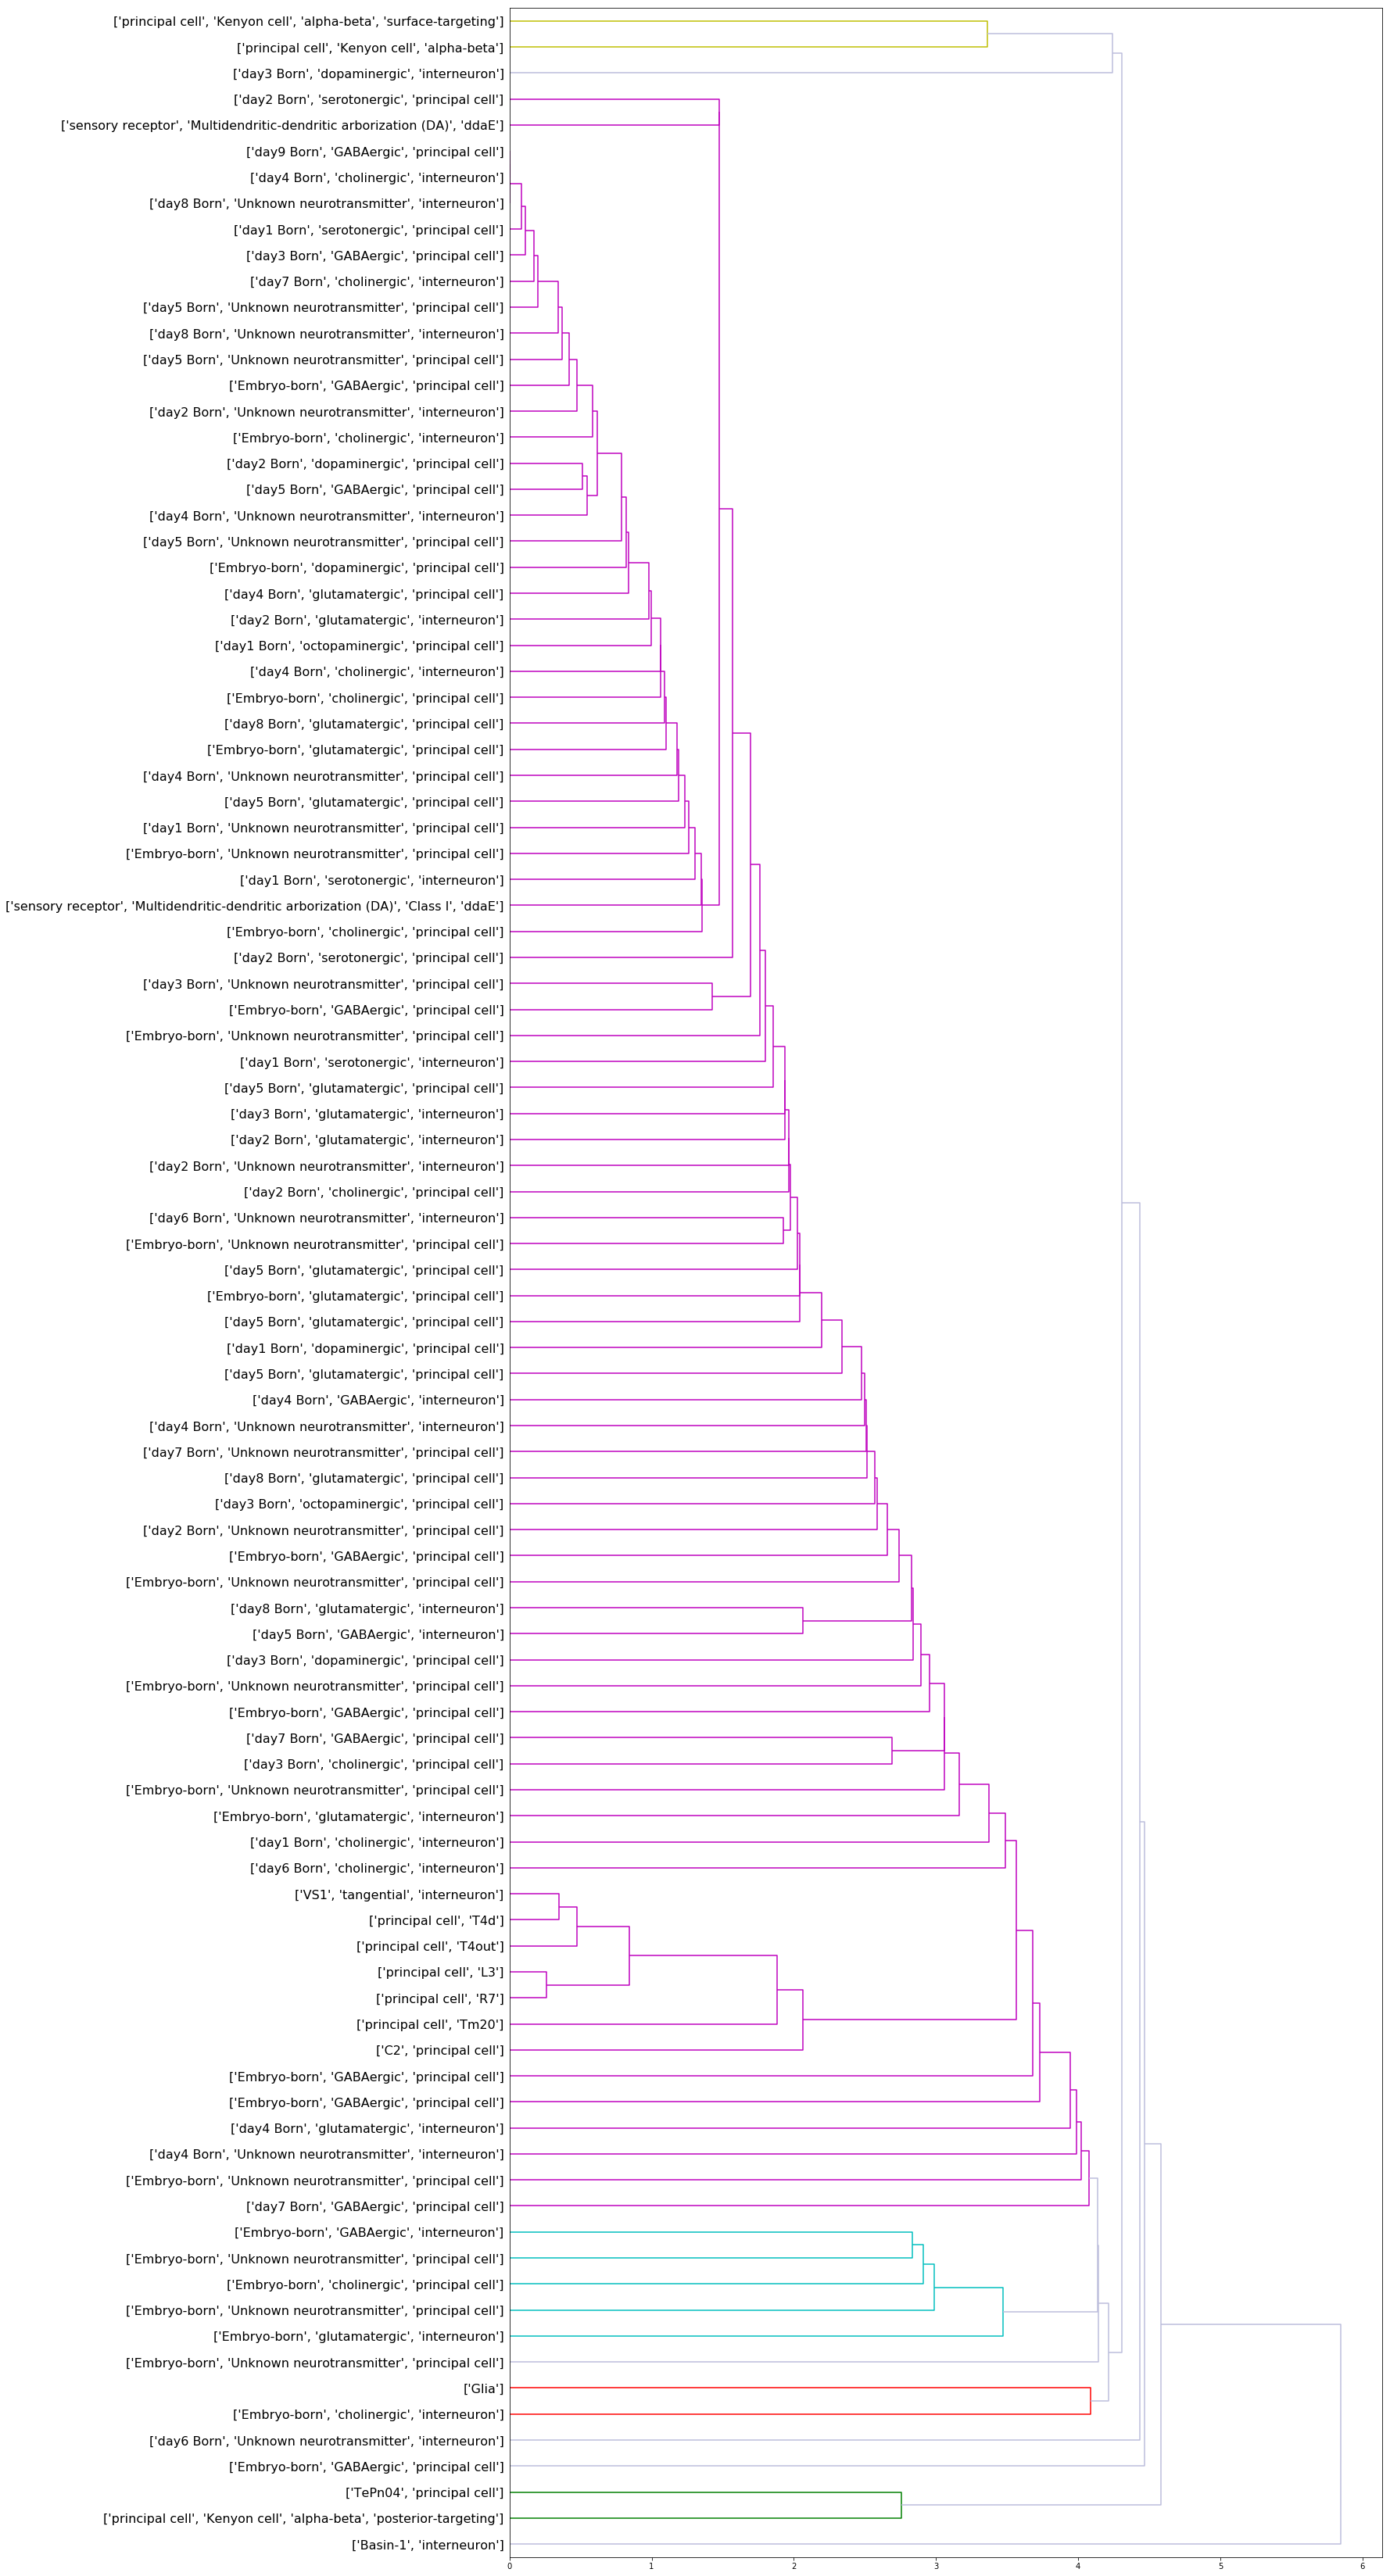

In [21]:
hierarchical_clustering.plot_dendrogram(X,names, method="single", metric="cityblock")

## Todo
To improve on this, 
- Scale up the sample size
- Select from well-characterized samples 
- Tune parameters: kernel bandwidth, distance metric
- Normalization: max length? 